In [13]:
import sys
sys.path.append('..')

from src.dataset import load_and_preprocess_dataset

image_pixel_size = 64
device = "cpu"

dl = load_and_preprocess_dataset(
    path="tkarr/sprite_caption_dataset",
    split="valid",
    image_pixel_size=image_pixel_size,
    batch_size=1,
)

input_tensor_batch.shape: torch.Size([1, 3, 64, 64])


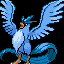

In [14]:
from PIL import Image
from IPython.display import display
from pathlib import Path

import torch

from src.vae import ConvVAE
from src.utils import tensor_batch_to_pil_images

# Get the first batch from the data loader
for batch in dl:
    input_tensor_batch: torch.Tensor = batch["tensor"]
    break
input_tensor_batch = input_tensor_batch.to(device)
print(f"input_tensor_batch.shape: {input_tensor_batch.shape}")
input_img: Image.Image = tensor_batch_to_pil_images(input_tensor_batch)[0]

display(input_img)

Using PyTorch Lightning checkpoint format
Hyperparameters: {'input_channels': 3, 'latent_dim': 128, 'hidden_dims': [256, 128, 64, 32], 'learning_rate': 0.0001}
Debug - Network structure: input_size=64, hidden_dims=[256, 128, 64, 32]
Debug - Last encoder size: 4, channels: 32
Created model with parameters: hidden_dims=[32, 64, 128, 256]
Error loading state dict, trying to match checkpoint weights...
Sample encoder weight shape: torch.Size([32, 3, 3, 3])
Detected checkpoint was trained with hidden_dims=[32, 64, 128, 256]
Debug - Network structure: input_size=64, hidden_dims=[32, 64, 128, 256]
Debug - Last encoder size: 4, channels: 256
Successfully loaded state dict after adjusting hidden_dims!
reconstructed.shape: torch.Size([1, 3, 64, 64])
mu.shape: torch.Size([1, 128])
log_var.shape: torch.Size([1, 128])
num reconstructed images: 1


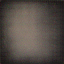

In [15]:
from src.dataset import cleanup_dataloader

# Load the model
model = ConvVAE.load_model(Path("../checkpoints/vae-best.ckpt"), device=device)

# Use deterministic encoding and decoding for clearer images
with torch.no_grad():
    # Get the mean representation without sampling
    mu, log_var = model.encode(input_tensor_batch)
    # Decode directly from mu without adding random noise
    reconstructed_tensor_batch = model.decode(mu)
    print(f"reconstructed.shape: {reconstructed_tensor_batch.shape}")
    print(f"mu.shape: {mu.shape}")
    print(f"log_var.shape: {log_var.shape}")

reconstructed_images: list[Image.Image] = tensor_batch_to_pil_images(reconstructed_tensor_batch)
print(f"num reconstructed images: {len(reconstructed_images)}")
display(reconstructed_images[0])

cleanup_dataloader(dl)